<a href="https://colab.research.google.com/github/Avuraedor/Avuraedor/blob/main/Model_Designed_to_obtain_Insights_from_a_Dataset_By_Avura_Edor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import modules

import pandas as pd
import numpy as np

In [2]:
# Read in dataset

df = pd.read_csv("/content/nyc_squirrels.csv")

In [3]:
## Print the first 10 Rows
df.head(10)

,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,...,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13
5,-73.956570,40.790256,33H-AM-1019-02,33H,AM,10192018,2,Juvenile,Gray,Cinnamon,...,False,False,False,NaN,POINT (-73.9565700386162 40.7902561000937),NaN,19,4,19,13
6,-73.971974,40.769305,6G-PM-1020-02,06G,PM,10202018,2,Adult,Gray,NaN,...,False,True,False,NaN,POINT (-73.9719735582476 40.7693045133578),NaN,19,4,19,13
7,-73.960261,40.794288,35C-PM-1013-03,35C,PM,10132018,3,NaN,Gray,Cinnamon,...,False,False,True,NaN,POINT (-73.9602609920814 40.79428830455661),NaN,19,4,19,13
8,-73.977072,40.772975,7B-AM-1008-09,07B,AM,10082018,9,Adult,Gray,NaN,...,False,True,False,NaN,POINT (-73.9770718586754 40.7729752391435),NaN,19,4,19,13
9,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029),NaN,19,4,19,13


In [4]:
# Shape of dataset

df.shape

(3023, 36)

# DATA CLEANING

In [6]:
# Check for missing values
df.isnull().sum()

long                                             0
lat                                              0
unique_squirrel_id                               0
hectare                                          0
shift                                            0
date                                             0
hectare_squirrel_number                          0
age                                            121
primary_fur_color                               55
highlight_fur_color                           1086
combination_of_primary_and_highlight_color       0
color_notes                                   2841
location                                        64
above_ground_sighter_measurement               114
specific_location                             2547
running                                          0
chasing                                          0
climbing                                         0
eating                                           0
foraging                       

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   long                                        3023 non-null   float64
 1   lat                                         3023 non-null   float64
 2   unique_squirrel_id                          3023 non-null   object 
 3   hectare                                     3023 non-null   object 
 4   shift                                       3023 non-null   object 
 5   date                                        3023 non-null   int64  
 6   hectare_squirrel_number                     3023 non-null   int64  
 7   age                                         2902 non-null   object 
 8   primary_fur_color                           2968 non-null   object 
 9   highlight_fur_color                         1937 non-null   object 
 10  combination_

In [8]:
# Get basic statistics with.describe

df.describe()

,long,lat,date,hectare_squirrel_number,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
count,3023.000000,3023.000000,3.023000e+03,3023.000000,9.000000,3023.000000,3023.0,3023.000000,3023.000000
mean,-73.967184,40.780853,1.011949e+07,4.123718,11828.222222,18.996030,4.0,19.070460,13.004631
std,0.007726,0.010285,4.246671e+04,3.096492,995.983782,0.234339,0.0,1.352253,0.224224
min,-73.981159,40.764911,1.006202e+07,1.000000,10090.000000,11.000000,4.0,19.000000,10.000000
25%,-73.973102,40.771676,1.008202e+07,2.000000,12081.000000,19.000000,4.0,19.000000,13.000000
50%,-73.968594,40.778166,1.012202e+07,3.000000,12420.000000,19.000000,4.0,19.000000,13.000000
75%,-73.960189,40.791219,1.014202e+07,6.000000,12423.000000,19.000000,4.0,19.000000,13.000000
max,-73.949722,40.800119,1.020202e+07,23.000000,12423.000000,23.000000,4.0,51.000000,18.000000


In [9]:
# Value counts

df['primary_fur_color'].value_counts()

primary_fur_color
Gray        2473
Cinnamon     392
Black        103
Name: count, dtype: int64

In [10]:
# Distribution of Squirrel Colors

df['combination_of_primary_and_highlight_color'].value_counts()

combination_of_primary_and_highlight_color
Gray+                          895
Gray+Cinnamon                  752
Gray+White                     489
Gray+Cinnamon, White           265
Cinnamon+Gray                  162
Cinnamon+White                  94
Black+                          74
Cinnamon+                       62
Cinnamon+Gray, White            58
+                               55
Gray+Black, Cinnamon, White     32
Gray+Black                      24
Black+Cinnamon                  15
Cinnamon+Black                  10
Gray+Black, Cinnamon             9
Black+Gray                       8
Gray+Black, White                7
Black+Cinnamon, White            3
Cinnamon+Black, White            3
Cinnamon+Gray, Black             3
Black+White                      2
Black+Gray, White                1
Name: count, dtype: int64

In [11]:
# Age Distribution
df['age'].value_counts()

age
Adult       2568
Juvenile     330
?              4
Name: count, dtype: int64

In [12]:
#	Location Analysis
df['location'].value_counts()

location
Ground Plane    2116
Above Ground     843
Name: count, dtype: int64

In [13]:
#	other_interactions

df['other_interactions'].value_counts()

other_interactions
runs from (dog)                       9
curious                               6
runs from (me)                        5
me                                    4
stared                                4
                                     ..
ran two feet up tree trunk            1
scared                                1
runs from (kids kicking the fence)    1
asleep                                1
scolding                              1
Name: count, Length: 197, dtype: int64

In [14]:
# police_precincts

df['police_precincts'].value_counts()

police_precincts
13    3013
18       5
10       2
11       2
12       1
Name: count, dtype: int64

In [15]:
## Drop other_interactions, zip_codes, other_activities, color_notes and specific_location

df.drop(['zip_codes', 'other_interactions', 'other_activities', 'specific_location', 'color_notes'], axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   long                                        3023 non-null   float64
 1   lat                                         3023 non-null   float64
 2   unique_squirrel_id                          3023 non-null   object 
 3   hectare                                     3023 non-null   object 
 4   shift                                       3023 non-null   object 
 5   date                                        3023 non-null   int64  
 6   hectare_squirrel_number                     3023 non-null   int64  
 7   age                                         2902 non-null   object 
 8   primary_fur_color                           2968 non-null   object 
 9   highlight_fur_color                         1937 non-null   object 
 10  combination_

In [17]:
df.isnull().sum()

long                                             0
lat                                              0
unique_squirrel_id                               0
hectare                                          0
shift                                            0
date                                             0
hectare_squirrel_number                          0
age                                            121
primary_fur_color                               55
highlight_fur_color                           1086
combination_of_primary_and_highlight_color       0
location                                        64
above_ground_sighter_measurement               114
running                                          0
chasing                                          0
climbing                                         0
eating                                           0
foraging                                         0
kuks                                             0
quaas                          

In [18]:
df.above_ground_sighter_measurement.value_counts()

above_ground_sighter_measurement
FALSE    2116
10        116
20         84
15         71
2          55
3          52
5          51
30         44
4          42
25         33
6          32
1          30
8          30
40         25
7          19
50         19
12         16
13         11
35         10
28          7
18          5
100         5
45          4
9           4
17          3
60          3
14          2
24          2
23          2
65          2
11          2
43          2
16          2
33          1
31          1
80          1
0           1
180         1
55          1
70          1
19          1
Name: count, dtype: int64

In [19]:
df.location.value_counts()

location
Ground Plane    2116
Above Ground     843
Name: count, dtype: int64

In [20]:
df.highlight_fur_color.value_counts()

highlight_fur_color
Cinnamon                  767
White                     585
Cinnamon, White           268
Gray                      170
Gray, White                59
Black                      34
Black, Cinnamon, White     32
Black, White               10
Black, Cinnamon             9
Gray, Black                 3
Name: count, dtype: int64

In [21]:
df.primary_fur_color.value_counts()

primary_fur_color
Gray        2473
Cinnamon     392
Black        103
Name: count, dtype: int64

In [22]:
df.drop(['primary_fur_color', 'highlight_fur_color', 'location', 'above_ground_sighter_measurement'], axis=1, inplace=True)

In [23]:
df.isnull().sum()

long                                            0
lat                                             0
unique_squirrel_id                              0
hectare                                         0
shift                                           0
date                                            0
hectare_squirrel_number                         0
age                                           121
combination_of_primary_and_highlight_color      0
running                                         0
chasing                                         0
climbing                                        0
eating                                          0
foraging                                        0
kuks                                            0
quaas                                           0
moans                                           0
tail_flags                                      0
tail_twitches                                   0
approaches                                      0


In [32]:
def convert_age_group(age_group_str):
    """Converts an age group string to a numerical value."""
    if age_group_str == "Adult":
        return 1
    elif age_group_str == "Juvenile":
        return 0
    else:
        return -1  # Handle unknown age groups

age_group_str = "Adult"
age_group_num = convert_age_group(age_group_str)

print(f"The numerical value for '{age_group_str}' is {age_group_num}.")

The numerical value for 'Adult' is 1.


In [33]:
# Get the mode age
mode_age = df.age.mode()

In [34]:
# Replace all missing values with the mode

df['age'].fillna(mode_age, inplace=True)

In [35]:
# Convert age column to numeric, handling non-numeric values
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Convert age column to integers, filling NaNs with a suitable value (e.g., -1)
df['age'] = df['age'].fillna(-1).astype(int)

In [59]:
df.isnull().sum()

long                                          0
lat                                           0
unique_squirrel_id                            0
hectare                                       0
shift                                         0
date                                          0
hectare_squirrel_number                       0
age                                           0
combination_of_primary_and_highlight_color    0
running                                       0
chasing                                       0
climbing                                      0
eating                                        0
foraging                                      0
kuks                                          0
quaas                                         0
moans                                         0
tail_flags                                    0
tail_twitches                                 0
approaches                                    0
indifferent                             

# Data Visualization

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

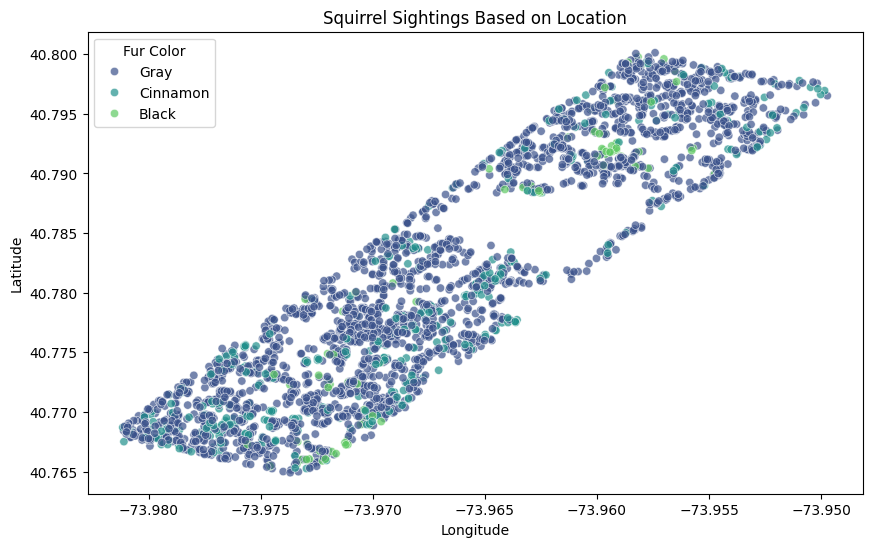

In [8]:
# 1. Geospatial Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='lat', data=df, hue='primary_fur_color', palette='viridis', alpha=0.7)
plt.title('Squirrel Sightings Based on Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fur Color')
plt.show()

# From the scatter plot above of squirrel sightings, we are able to deduce the following insights:

1. Distribution of Fur Colors:

The plot shows sightings of squirrels categorized by their primary fur color: Gray, Cinnamon, and Black.
Gray squirrels are the most prevalent, while Cinnamon and Black squirrels are less common.

2. Geographic Spread:

The sightings are spread across a specific geographic area.
This distribution could represent an area such as a park or a defined region within a city.


<ipython-input-13-38512f76971a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='location', data=df, palette='viridis')


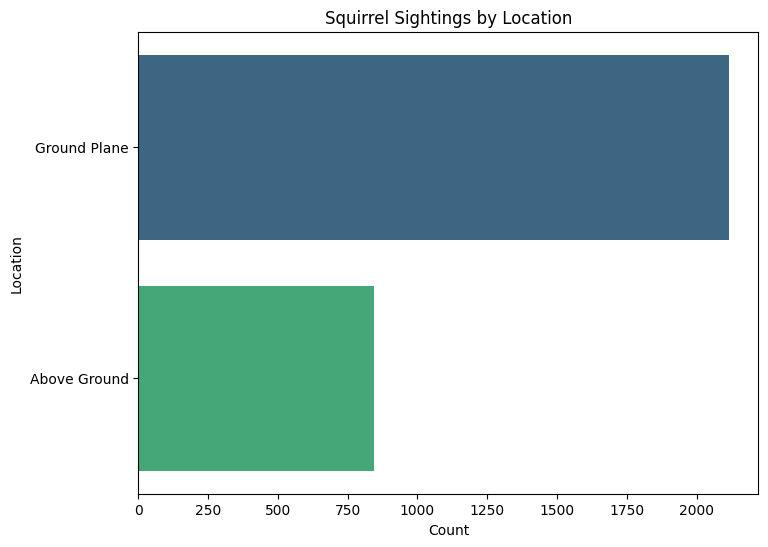

In [13]:
# 2. Location-Based Analysis
plt.figure(figsize=(8, 6))
sns.countplot(y='location', data=df, palette='viridis')
plt.title('Squirrel Sightings by Location')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

# The bar plot above shows the distribution of squirrel sightings based on their location, divided into "Ground Plane" and "Above Ground".

Insights from the above bar plot:

-Ground Plane Sightings:
The majority of squirrel sightings (around 2000) are on the ground plane. This suggests that squirrels spend most of their time on the ground, possibly for activities such as foraging, eating, or moving between locations.

-Above Ground Sightings:
There are significantly fewer sightings above ground (around 1000). These sightings might correspond to activities such as climbing trees, being on branches, or other above-ground behaviors.

# Implications:

Habitat Preference:
-Squirrels seem to prefer staying on the ground, which could be due to the availability of food resources or safer navigation compared to moving in trees.

Behavioral Inferences:
-Ground sightings likely correspond to behaviors like foraging, eating, and interacting with other squirrels.

-Above-ground sightings might be associated with behaviors like climbing, escaping predators, or finding shelter.

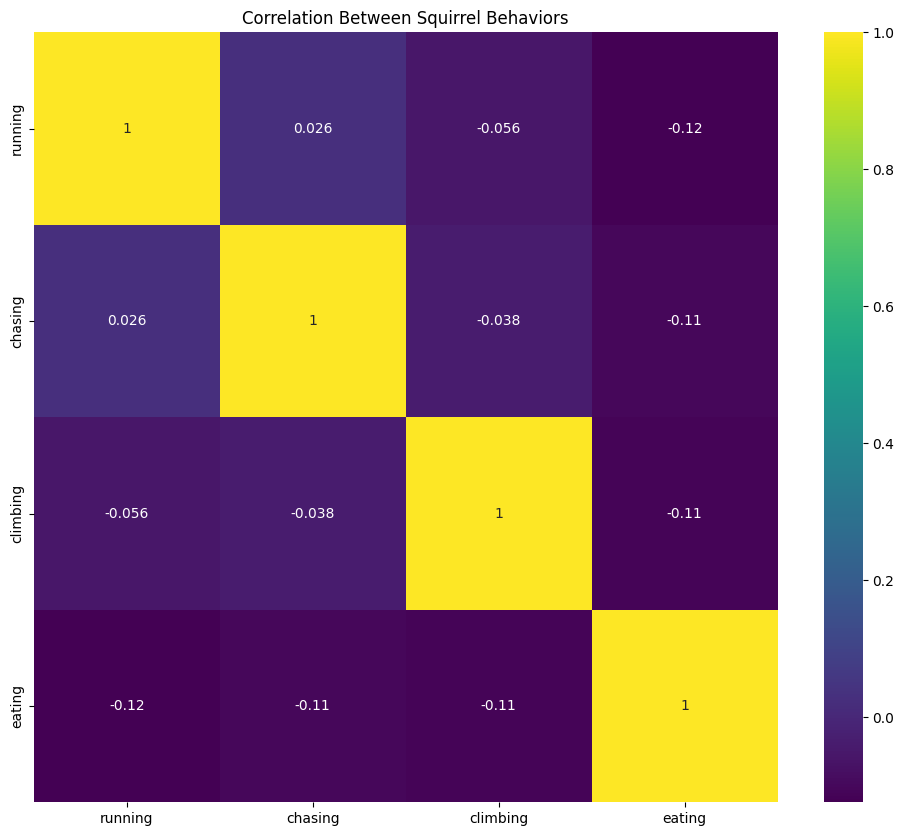

In [38]:
# 3. Behavioral Insights
plt.figure(figsize=(12, 10))
behavior_columns = ['running', 'chasing', 'climbing', 'eating']
behavior_df = df[behavior_columns]

sns.heatmap(behavior_df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Between Squirrel Behaviors')
plt.show()

# The heatmap above illustrates the correlation between different squirrel behaviors: running, chasing, climbing, and eating. Find key insights from this visualization:

-All the correlations are relatively weak (close to zero), indicating that these behaviors are mostly independent of each other.

-The negative correlations suggest that certain behaviors, like running and eating, or climbing and eating, are less likely to occur simultaneously.

-The only positive correlation, although very weak, is between running and chasing, implying a slight tendency for these behaviors to occur together

# I would Recommend Further Analysis such as;

Temporal Analysis to investigate if these behaviors show stronger correlations during specific times of the day or seasons.

Behavioral Sequence Analysis: I would recommend examining if certain behaviors follow a sequence, e.g., if squirrels tend to run before climbing or eat after foraging.

I would also suggest analysing how environmental factors (e.g., location, time of day, weather conditions) influence the occurrence and correlation of these behaviors.